In [1]:
import ipywidgets as widgets
import json
import requests
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from IPython.display import display, HTML

url = "https://www.dmi.dk/dmidk_byvejrWS/rest/location/area/1000/55.1/56.2/11.2/14.0"

r = requests.get(url)
r.encoding = 'utf-8'
res = r.json()

In [2]:
data = {}
for city in res:
    data[city['name']] = city['id']

In [3]:
city = widgets.Dropdown(
    options=sorted(data),
    value="København",
    description='Number:',
    disabled=False,
)
display(city)

Dropdown(description='Number:', index=134, options=('Abbekås', 'Albertslund', 'Allerum', 'Allerød', 'Alstad', …

In [25]:
urlcity = "https://www.dmi.dk/NinJo2DmiDk/ninjo2dmidk?cmd=llj&id={}&tz=Europe/Copenhagen".format(data[city.value])
r = requests.get(urlcity)
r.encoding = 'utf-8'
res = r.json()

In [ ]:
data = res['timeserie']
for obs in data:
    for item in obs:
        print("{}:{}".format(item,obs[item]))


In [27]:
df = pd.read_json(r.text,typ='frame',orient='records',encoding='utf-8' )

In [28]:
df = pd.concat([df.drop(['timeserie'], axis=1), df['timeserie'].apply(pd.Series)], axis=1)

In [ ]:
df.drop(["city","country","id","lastupdate","latitude","longitude","sunrise","sunset","timezone"], axis=1)

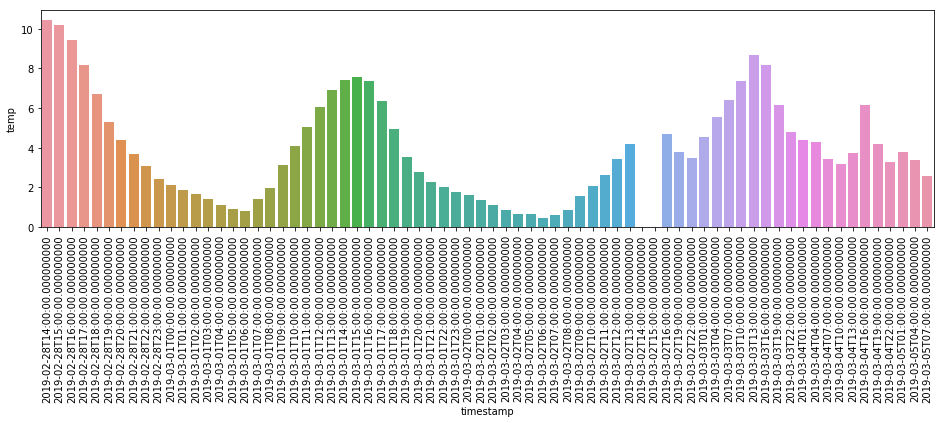

In [30]:
df['timestamp'] = df.apply(lambda x: datetime.datetime.strptime(x['time'],'%Y%m%d%H%M%S'), axis=1)
df['t'] = df.apply(lambda x: round(x['temp'],0), axis=1)
plt.rcParams["figure.figsize"] =(16,4)
ax = sns.barplot(y="temp", x="timestamp", data=df.loc[1:72 ,])
for item in ax.get_xticklabels():
    item.set_rotation(90)
    

In [32]:
print("Min temp is {}".format(df.t.min()))
print("Max temp is {}".format(df.t.max()))
print("Min record")
display(HTML(df[df['t'] == df.t.min()].to_html()))

print("Max record")
display(HTML(df[df['t'] == df.t.max()].to_html()))

Min temp is -5.0
Max temp is 10.0
Min record


,city,country,id,lastupdate,latitude,longitude,sunrise,sunset,timezone,humidity,prec10,prec50,prec75,prec90,precip1,precip3,precip6,precipType,pressure,symbol,temp,temp10,temp50,temp90,time,visibility,windDegree,windDir,windGust,windSpeed,windspeed10,windspeed50,windspeed90,timestamp,t
80,København,DK,2618425,20190228123640,55.67594,12.56553,704,1741,Europe/Copenhagen,82.35678,NaN,NaN,NaN,NaN,NaN,NaN,0.0,sne,1013.17126,1.0,-4.831238,NaN,NaN,NaN,20190306070000,NaN,317.849419,NV,NaN,1.609391,NaN,NaN,NaN,2019-03-06 07:00:00,-5.0


Max record


,city,country,id,lastupdate,latitude,longitude,sunrise,sunset,timezone,humidity,prec10,prec50,prec75,prec90,precip1,precip3,precip6,precipType,pressure,symbol,temp,temp10,temp50,temp90,time,visibility,windDegree,windDir,windGust,windSpeed,windspeed10,windspeed50,windspeed90,timestamp,t
0,København,DK,2618425,20190228123640,55.67594,12.56553,704,1741,Europe/Copenhagen,42.121690,-0.000079,0.0,0.0,0.000032,0.0,0.0,0.0,regn,1008.54315,1.0,10.159515,9.041473,10.225311,11.147247,20190228130000,62656.260,337.850328,NNV,8.855022,3.325939,2.858570,3.321029,3.804244,2019-02-28 13:00:00,10.0
1,København,DK,2618425,20190228123640,55.67594,12.56553,704,1741,Europe/Copenhagen,39.782684,-0.000015,0.0,0.0,0.000041,0.0,0.0,0.0,regn,1008.95685,1.0,10.434570,9.358673,10.431580,11.471130,20190228140000,62657.723,335.516228,NNV,9.207598,3.626003,3.365493,3.582502,4.107125,2019-02-28 14:00:00,10.0
2,København,DK,2618425,20190228123640,55.67594,12.56553,704,1741,Europe/Copenhagen,39.768127,-0.000069,0.0,0.0,0.000017,0.0,0.0,0.0,regn,1008.51490,1.0,10.200348,9.226898,10.158417,11.147125,20190228150000,33362.227,331.578993,NNV,8.913063,3.721870,3.389740,3.707407,4.263792,2019-02-28 15:00:00,10.0
